# Part c and d 

In [1]:
from functions import *
mplstyle.use(['ggplot', 'fast'])
plt.rcParams.update({
     "text.usetex": True,       
     "font.family": "serif",    
     "font.size": 10, 
 })

from pathlib import Path
import matplotlib.pyplot as plt

out_dir = Path("../Figures")      # fra Code/ til Figures/
out_dir.mkdir(parents=True, exist_ok=True)
save_fig_or_not = True # Set to True when ready

seed = np.random.seed(2018)

# Hyperparameters from part a and b:
polynomial_degree     = 14
number_of_data_points = 1500
lambda_               = 1e-3
# Hyperparameters from part c, d e and f:
learning_rate = 0.1
n_iterations  = 100000
tolerance     = 1e-15
use_tol       = True
beta          = 0.9
beta1         = 0.9
beta2         = 0.999
epsilon       = 1e-8
# A list of learning rates to test
learning_rates = [0.001, 0.005, 0.01, 0.05, 0.1]
# A list of methods
methods = ['gd', 'momentum', 'adagrad', 'rmsprop', 'adam']

### Using shared functions to create dataset

In [2]:
train, test, full = make_data(number_of_data_points, seed)
x, y = full[0], full[1]

# We start by splitting the data into training and test sets
x_train, x_test, y_train, y_test = train[0], test[0], train[1], test[1]
x_train = x_train.reshape(-1, 1)
x_test  = x_test.reshape(-1, 1)
x = x.reshape(-1, 1)

# Making a design matrix based of the scaled data
X_train = polynomial_features(x_train, polynomial_degree, intercept=True)
X_test  = polynomial_features(x_test, polynomial_degree, intercept=True)

## Part c: Writing your own gradient decent code 

Replace now the analytical expressions for the optimal parameters $\theta$ with your own gradient descent code. In this exercise we focus only on the simplest gradient descent approach with a fixed learning rate (excercises from week 37 and lecture notes from week 36).

Study and compare your results from parts a) and b) with your gradient descent approach. Discuss in particular the role of the learning rate.

OLS did not converge.
Ridge converged after 45314 iterations.
Ridge did not converge.


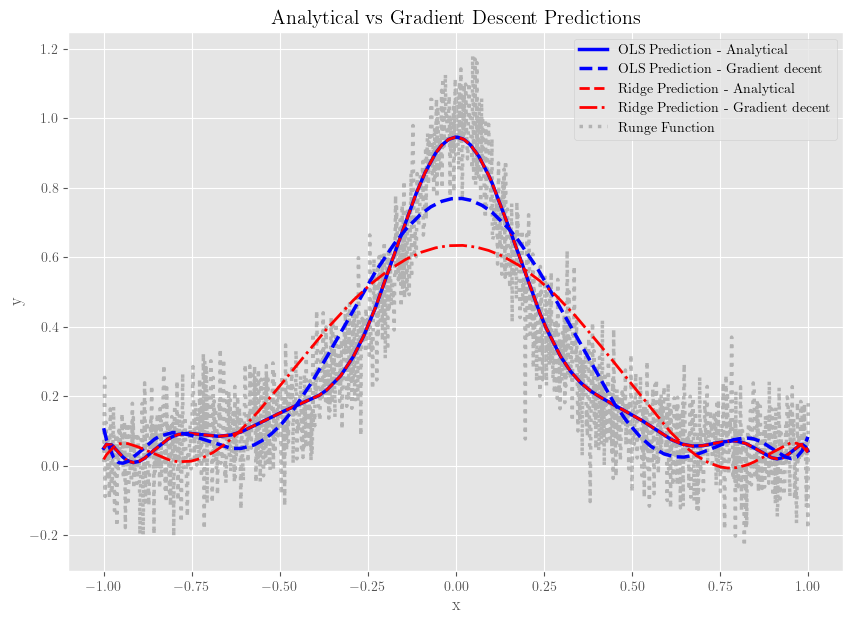

In [3]:
cost_history_ols,   y_pred_ols,   y_pred_gd_ols,   theta_ols,   theta_gd_ols   = create_analytical_and_gradient_decent(X_test, y_test, X_train, y_train, 'OLS', learning_rate, n_iterations, tolerance, use_tol, lambda_)
cost_history_ridge, y_pred_ridge, y_pred_gd_ridge, theta_ridge, theta_gd_ridge = create_analytical_and_gradient_decent(X_test, y_test, X_train, y_train, 'Ridge', learning_rate, n_iterations, tolerance, use_tol, lambda_)

# plt.figure(figsize=(5, 3))
# plt.plot(cost_history_ols,   color='blue', label='OLS',  linestyle='--')
# plt.plot(cost_history_ridge, color='red', label='Ridge', linestyle='--')
# plt.title("Gradient Descent Cost History")
# plt.xlabel("Iteration")
# plt.ylabel("Cost")
# plt.legend()
# plt.show()

# Plot the results from OLS and Ridge on the test data
plt.figure(figsize=(10, 7))
# Sort x_test and corresponding predictions for better plotting
sort_indices = np.argsort(x_test.flatten())
plt.plot(x_test[sort_indices], y_pred_ols[sort_indices],      color='blue', label='OLS Prediction - Analytical',       zorder=5, linewidth=2.5)
plt.plot(x_test[sort_indices], y_pred_gd_ols[sort_indices],   color='blue', label='OLS Prediction - Gradient decent',  zorder=8, linewidth=2.5, linestyle='--')
plt.plot(x_test[sort_indices], y_pred_ridge[sort_indices],    color='red', label='Ridge Prediction - Analytical',      zorder=5, linewidth=2, linestyle='--')
plt.plot(x_test[sort_indices], y_pred_gd_ridge[sort_indices], color='red', label='Ridge Prediction - Gradient decent', zorder=8, linewidth=2, linestyle='-.')
# Also plot the true function, however we need to sort x for this
sort_indices_full = np.argsort(x.flatten())
plt.plot(x[sort_indices_full], y[sort_indices_full], color='gray', linestyle=':', label='Runge Function', linewidth=2.5, alpha=0.5)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Analytical vs Gradient Descent Predictions")
plt.legend()
if save_fig_or_not == True:
    plt.savefig(out_dir / "C_gradient_decent_vs_analytical.pdf", dpi=200, bbox_inches="tight")
plt.show()

In [4]:
# Iterate through the learning rates for both OLS and Ridge
predictions_ols = {}
predictions_ridge = {}
cost_histories_ols = {}
cost_histories_ridge = {}

for lr in learning_rates:
    # Get predictions and cost history for OLS
    cost_histories_ols[lr], y_pred_ols, y_pred_gd_ols, theta_ols, theta_gd_ols = create_analytical_and_gradient_decent(X_test, y_test, X_train, y_train, 'OLS', lr, n_iterations, tolerance, use_tol, lambda_)
    # Store the predictions in the dictionary
    predictions_ols[lr] = (y_pred_ols, y_pred_gd_ols)
    # Get predictions and cost history for Ridge
    cost_histories_ridge[lr], y_pred_ridge, y_pred_gd_ridge, theta_ridge, theta_gd_ridge = create_analytical_and_gradient_decent(X_test, y_test, X_train, y_train, 'Ridge', lr, n_iterations, tolerance, use_tol, lambda_)
    # Store the predictions in the dictionary
    predictions_ridge[lr] = (y_pred_ridge, y_pred_gd_ridge)

# # Plot the cost histories for OLS and Ridge
# plt.figure(figsize=(10, 5))
# # Plot OLS cost histories
# for lr, costs in cost_histories_ols.items():
#     plt.plot(costs, label=f'OLS LR={lr}', linestyle='--')
# # Plot Ridge cost histories
# for lr, costs in cost_histories_ridge.items():
#     plt.plot(costs, label=f'Ridge LR={lr}')
# plt.title("Gradient Descent Cost History for Different Learning Rates")
# plt.xlabel("Iteration")
# plt.ylabel("Cost")
# # Making the legend outside the plot
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
# plt.yscale('log')  # Use log scale for better visibility of cost differences
# plt.show()

OLS did not converge.
Ridge did not converge.
OLS did not converge.
Ridge did not converge.
OLS did not converge.
Ridge did not converge.
OLS did not converge.
Ridge converged after 87348 iterations.
Ridge did not converge.
OLS did not converge.
Ridge converged after 45314 iterations.
Ridge did not converge.


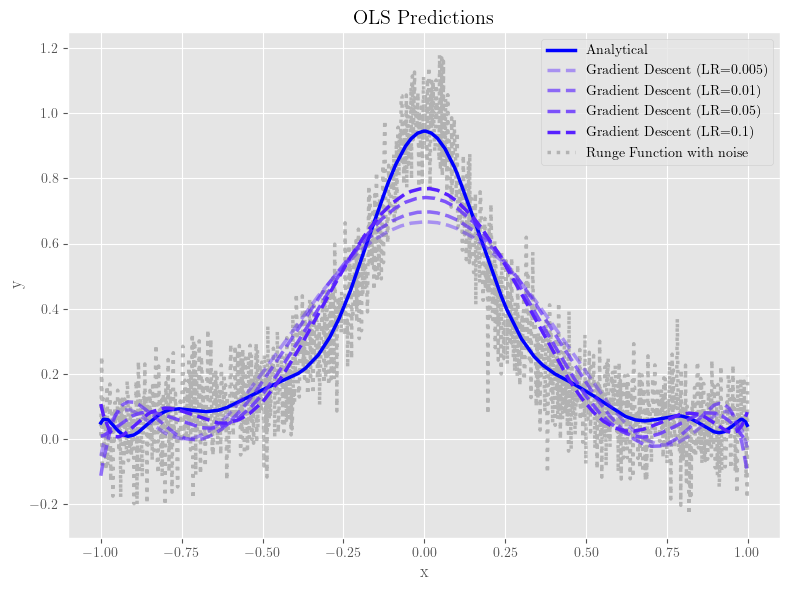

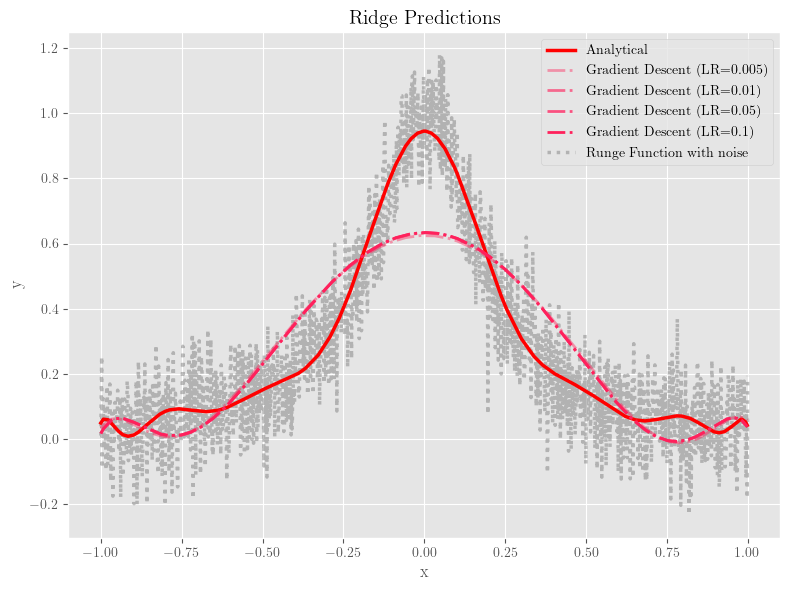

In [5]:

lrcolorsblue = { 0.001: "#5821FF4F", 0.005: "#5821FF6D", 0.01: "#5821FFA1", 0.05: "#6734FFD5", 0.1: "#5821FF"}
lrcolorsred  = { 0.001: "#FF21524F", 0.005: "#FF21576D", 0.01: "#FF215CA1", 0.05: "#FF346CD5", 0.1: "#FF215C"}

# Plot the results from OLS on the test data for different learning rates
plt.figure(figsize=(8, 6))

# For each learning rate, plot the predictions
for lr in learning_rates:
    y_pred_ols, y_pred_gd_ols     = predictions_ols[lr]
    sort_indices = np.argsort(x_test.flatten())
    if lr == 0.001:
        plt.plot(x_test[sort_indices], y_pred_ols[sort_indices], color='blue', label=f'Analytical', zorder=5, linewidth=2.5)
    else:
        plt.plot(x_test[sort_indices], y_pred_gd_ols[sort_indices], color=lrcolorsblue[lr], label=f'Gradient Descent (LR={lr})', zorder=8, linewidth=2.5, linestyle='--')
# Plot the true function
sort_indices_full = np.argsort(x.flatten())
plt.plot(x[sort_indices_full], y[sort_indices_full], color='gray', linestyle=':', label='Runge Function with noise', linewidth=2.5, alpha=0.5)
plt.xlabel("x")
plt.ylabel("y")
plt.title("OLS Predictions")
plt.legend()
plt.tight_layout()
if save_fig_or_not == True:
    plt.savefig(out_dir / "C_OLS_gradient_decent_vs_analytical.pdf", dpi=200, bbox_inches="tight")
plt.show()

# Plot the results from Ridge on the test data for different learning rates
plt.figure(figsize=(8, 6))
# For each learning rate, plot the predictions
for lr in learning_rates:
    y_pred_ridge, y_pred_gd_ridge = predictions_ridge[lr]
    sort_indices = np.argsort(x_test.flatten())
    if lr == 0.001:
        plt.plot(x_test[sort_indices], y_pred_ridge[sort_indices], color='red', label=f'Analytical', zorder=5, linewidth=2.5)
    else:
        plt.plot(x_test[sort_indices], y_pred_gd_ridge[sort_indices], color=lrcolorsred[lr], label=f'Gradient Descent (LR={lr})', zorder=8, linewidth=2, linestyle='-.')
# Plot the true function
plt.plot(x[sort_indices_full], y[sort_indices_full], color='gray', linestyle=':', label='Runge Function with noise', linewidth=2.5, alpha=0.5)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ridge Predictions")
plt.legend()
plt.tight_layout()
if save_fig_or_not == True:
    plt.savefig(out_dir / "C_Ridge_gradient_decent_vs_analytical.pdf", dpi=200, bbox_inches="tight")
plt.show()


OLS did not converge.
Ridge did not converge.
OLS did not converge.
Ridge did not converge.
OLS did not converge.
Ridge did not converge.
OLS did not converge.
Ridge converged after 87348 iterations.
Ridge did not converge.
OLS did not converge.
Ridge converged after 45314 iterations.
Ridge did not converge.


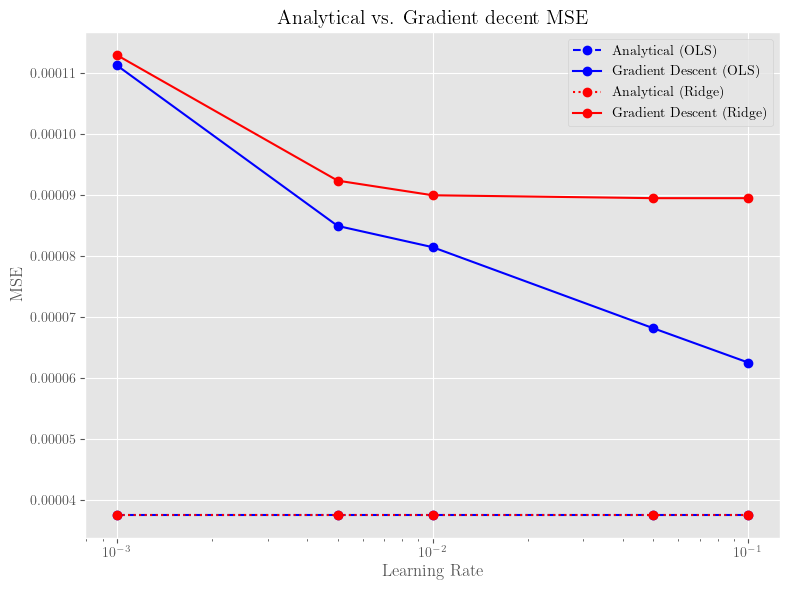

In [6]:
# Create data for plotting:
mse_values_ols, mse_gd_values_ols, mse_values_ridge, mse_gd_values_ridge, y_pred_ols, y_pred_gd_ols, y_pred_ridge, y_pred_gd_ridge = compare_analytical_and_gradient_decent(X_test, y_test, X_train, y_train, learning_rates, n_iterations, tolerance, use_tol, lambda_)
# Plot the MSE values_
plt.figure(figsize=(8, 6))
plt.plot(learning_rates, mse_values_ols, marker='o', label='Analytical (OLS)', color='blue', linestyle='--')
plt.plot(learning_rates, mse_gd_values_ols, marker='o', label='Gradient Descent (OLS)', color='blue', linestyle='-')
plt.plot(learning_rates, mse_values_ridge, marker='o', label='Analytical (Ridge)', color='red', linestyle=':')
plt.plot(learning_rates, mse_gd_values_ridge, marker='o', label='Gradient Descent (Ridge)', color='red', linestyle='-')
plt.xscale('log')  # Using log scale for the learning rates
plt.xlabel("Learning Rate")
plt.ylabel("MSE")
plt.title(f"Analytical vs. Gradient decent MSE")
plt.legend()
plt.tight_layout()
if save_fig_or_not == True:
    plt.savefig(out_dir / f"C_analytical_ols_ridge_comparison_MSE.pdf", dpi=200, bbox_inches="tight")
plt.show()

## Part d: Including momentum and more advanced ways to update the learning the rate

We keep our focus on OLS and Ridge regression and update our code for
the gradient descent method by including **momentum**, **ADAgrad**,
**RMSprop** and **ADAM** as methods fro iteratively updating your learning
rate. Discuss the results and compare the different methods applied to
the one-dimensional Runge function. The lecture notes from week 37 contain several examples on how to implement these methods.

In [7]:
results = {}
for method in methods:
    theta_OLS, cost_history_OLS     = gradient_descent_advanced(X_train, y_train, method=method, lr_method='ols',   learning_rate=0.001, n_iterations=n_iterations, tol=1e-10, use_tol=use_tol, beta=beta, beta1=beta1, beta2=beta2, epsilon=epsilon, lambda_=lambda_)
    theta_Ridge, cost_history_Ridge = gradient_descent_advanced(X_train, y_train, method=method, lr_method='ridge', learning_rate=0.001, n_iterations=n_iterations, tol=1e-10, use_tol=use_tol, beta=beta, beta1=beta1, beta2=beta2, epsilon=epsilon, lambda_=lambda_)
    theta_Lasso, cost_history_Lasso = gradient_descent_advanced(X_train, y_train, method=method, lr_method='lasso', learning_rate=0.001, n_iterations=n_iterations, tol=1e-10, use_tol=use_tol, beta=beta, beta1=beta1, beta2=beta2, epsilon=epsilon, lambda_=lambda_)
    y_pred_OLS   = X_test @ theta_OLS
    y_pred_Ridge = X_test @ theta_Ridge
    y_pred_Lasso = X_test @ theta_Lasso
    mse_OLS   = MSE(y_test, y_pred_OLS)
    r2_OLS    = R2(y_test, y_pred_OLS)
    mse_Ridge = MSE(y_test, y_pred_Ridge)
    r2_Ridge  = R2(y_test, y_pred_Ridge)
    mse_Lasso = MSE(y_test, y_pred_Lasso)
    r2_Lasso  = R2(y_test, y_pred_Lasso)
    results[method] = {
        'theta_OLS'         : theta_OLS,
        'cost_history_OLS'  : cost_history_OLS,
        'mse_OLS'           : mse_OLS,
        'r2_OLS'            : r2_OLS,
        'theta_Ridge'       : theta_Ridge,
        'cost_history_Ridge': cost_history_Ridge,
        'mse_Ridge'         : mse_Ridge,
        'r2_Ridge'          : r2_Ridge,
        'theta_Lasso'       : theta_Lasso,
        'cost_history_Lasso': cost_history_Lasso,
        'mse_Lasso'         : mse_Lasso,
        'r2_Lasso'          : r2_Lasso
    }
    print(f"OLS   : {method}: MSE = {mse_OLS:.6f}, R2 = {r2_OLS:.6f}")
    print(f"Ridge : {method}: MSE = {mse_Ridge:.6f}, R2 = {r2_Ridge:.6f}")
    print(f"Lasso : {method}: MSE = {mse_Lasso:.6f}, R2 = {r2_Lasso:.6f}")
    print()

OLS   : gd: MSE = 0.000111, R2 = 0.631736
Ridge : gd: MSE = 0.000113, R2 = 0.626153
Lasso : gd: MSE = 0.000111, R2 = 0.631965

OLS   : momentum: MSE = 0.000081, R2 = 0.730303
Ridge : momentum: MSE = 0.000090, R2 = 0.702148
Lasso : momentum: MSE = 0.000083, R2 = 0.724981

OLS   : adagrad: MSE = 0.000153, R2 = 0.492149
Ridge : adagrad: MSE = 0.000153, R2 = 0.493260
Lasso : adagrad: MSE = 0.000152, R2 = 0.495404

ridge: rmsprop converged after 3940 iterations.
lasso: rmsprop converged after 18420 iterations.
OLS   : rmsprop: MSE = 0.000054, R2 = 0.820339
Ridge : rmsprop: MSE = 0.000090, R2 = 0.703408
Lasso : rmsprop: MSE = 0.000075, R2 = 0.750306

ols: adam converged after 36897 iterations.
ridge: adam converged after 4649 iterations.
lasso: adam converged after 5552 iterations.
OLS   : adam: MSE = 0.000047, R2 = 0.844640
Ridge : adam: MSE = 0.000090, R2 = 0.703265
Lasso : adam: MSE = 0.000079, R2 = 0.738521



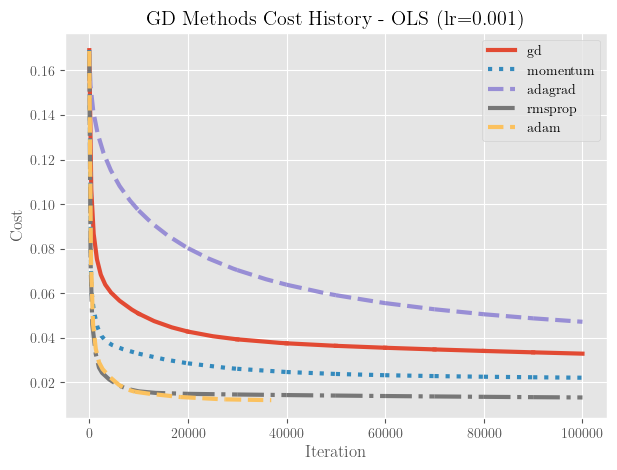

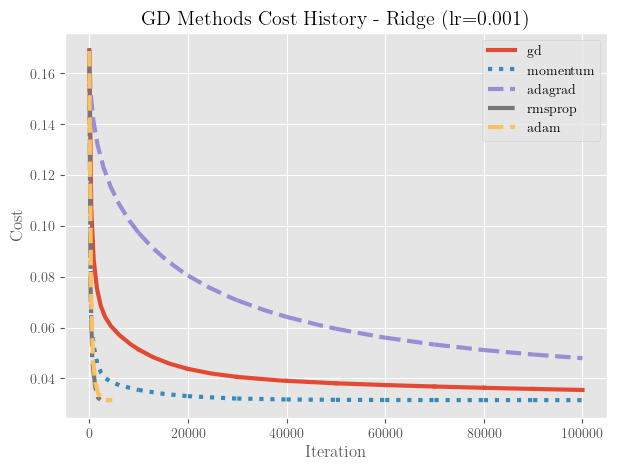

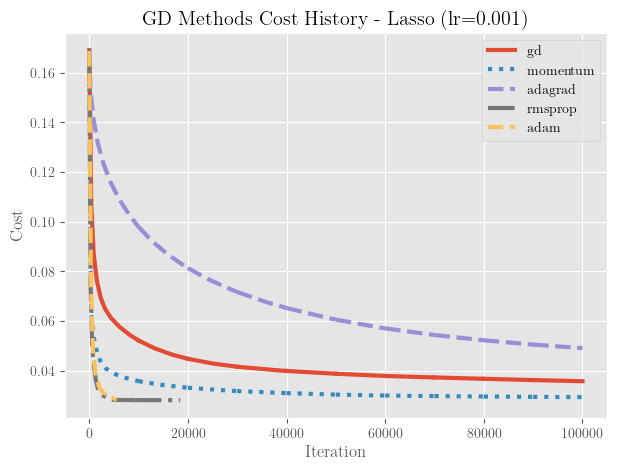

In [8]:
linestyle_cost_history = {'gd': '-', 'momentum': ':', 'adagrad': '--', 'rmsprop': '-.', 'adam': '--'}
# Plot cost history for all methods
plt.figure(figsize=(7, 5))
for method in methods:
    plt.plot(results[method]['cost_history_OLS'], label=method, linewidth=3, linestyle=linestyle_cost_history[method], alpha=1)#, color=colors_cost_history[method])
plt.title("GD Methods Cost History - OLS (lr=0.001)")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.legend()
if save_fig_or_not == True:
    plt.savefig(out_dir / f"C_cost_OLS_lr0001.pdf", dpi=200, bbox_inches="tight")
plt.show()
plt.figure(figsize=(7, 5))
for method in methods:
    plt.plot(results[method]['cost_history_Ridge'], label=method, linewidth=3, linestyle=linestyle_cost_history[method], alpha=1)#, color=colors_cost_history[method])
plt.title("GD Methods Cost History - Ridge (lr=0.001)")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.legend()
if save_fig_or_not == True:
    plt.savefig(out_dir / f"C_cost_Ridge_lr0001.pdf", dpi=200, bbox_inches="tight")
plt.show()
plt.figure(figsize=(7, 5))
for method in methods:
    plt.plot(results[method]['cost_history_Lasso'], label=method, linewidth=3, linestyle=linestyle_cost_history[method], alpha=1)#, color=colors_cost_history[method])
plt.title("GD Methods Cost History - Lasso (lr=0.001)")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.legend()
if save_fig_or_not == True:
    plt.savefig(out_dir / f"C_cost_Lasso_lr0001.pdf", dpi=200, bbox_inches="tight")
plt.show()

In [9]:
results = {}
for method in methods:
    theta_OLS, cost_history_OLS     = gradient_descent_advanced(X_train, y_train, method=method, lr_method='ols',   learning_rate=learning_rate, n_iterations=n_iterations, tol=tolerance, use_tol=use_tol, beta=beta, beta1=beta1, beta2=beta2, epsilon=epsilon, lambda_=lambda_)
    theta_Ridge, cost_history_Ridge = gradient_descent_advanced(X_train, y_train, method=method, lr_method='ridge', learning_rate=learning_rate, n_iterations=n_iterations, tol=tolerance, use_tol=use_tol, beta=beta, beta1=beta1, beta2=beta2, epsilon=epsilon, lambda_=lambda_)
    theta_Lasso, cost_history_Lasso = gradient_descent_advanced(X_train, y_train, method=method, lr_method='lasso', learning_rate=learning_rate, n_iterations=n_iterations, tol=tolerance, use_tol=use_tol, beta=beta, beta1=beta1, beta2=beta2, epsilon=epsilon, lambda_=lambda_)
    y_pred_OLS   = X_test @ theta_OLS
    y_pred_Ridge = X_test @ theta_Ridge
    y_pred_Lasso = X_test @ theta_Lasso
    mse_OLS   = MSE(y_test, y_pred_OLS)
    r2_OLS    = R2(y_test, y_pred_OLS)
    mse_Ridge = MSE(y_test, y_pred_Ridge)
    r2_Ridge  = R2(y_test, y_pred_Ridge)
    mse_Lasso = MSE(y_test, y_pred_Lasso)
    r2_Lasso  = R2(y_test, y_pred_Lasso)
    results[method] = {
        'theta_OLS'         : theta_OLS,
        'cost_history_OLS'  : cost_history_OLS,
        'mse_OLS'           : mse_OLS,
        'r2_OLS'            : r2_OLS,
        'theta_Ridge'       : theta_Ridge,
        'cost_history_Ridge': cost_history_Ridge,
        'mse_Ridge'         : mse_Ridge,
        'r2_Ridge'          : r2_Ridge,
        'theta_Lasso'       : theta_Lasso,
        'cost_history_Lasso': cost_history_Lasso,
        'mse_Lasso'         : mse_Lasso,
        'r2_Lasso'          : r2_Lasso
    }
    print(f"OLS   : {method}: MSE = {mse_OLS:.6f}, R2 = {r2_OLS:.6f}")
    print(f"Ridge : {method}: MSE = {mse_Ridge:.6f}, R2 = {r2_Ridge:.6f}")
    print(f"Lasso : {method}: MSE = {mse_Lasso:.6f}, R2 = {r2_Lasso:.6f}")
    print()

ridge: gd converged after 45314 iterations.
OLS   : gd: MSE = 0.000063, R2 = 0.792915
Ridge : gd: MSE = 0.000090, R2 = 0.703714
Lasso : gd: MSE = 0.000076, R2 = 0.747794

ridge: momentum converged after 4986 iterations.
OLS   : momentum: MSE = 0.000056, R2 = 0.813978
Ridge : momentum: MSE = 0.000090, R2 = 0.703715
Lasso : momentum: MSE = 0.000075, R2 = 0.750245

ridge: adagrad converged after 8427 iterations.
OLS   : adagrad: MSE = 0.000058, R2 = 0.806686
Ridge : adagrad: MSE = 0.000090, R2 = 0.703714
Lasso : adagrad: MSE = 0.000075, R2 = 0.750231

ridge: rmsprop converged after 4248 iterations.
OLS   : rmsprop: MSE = 0.000135, R2 = 0.553565
Ridge : rmsprop: MSE = 0.000188, R2 = 0.379176
Lasso : rmsprop: MSE = 0.000162, R2 = 0.464523

ridge: adam converged after 529 iterations.
OLS   : adam: MSE = 0.000044, R2 = 0.853276
Ridge : adam: MSE = 0.000090, R2 = 0.703715
Lasso : adam: MSE = 0.000076, R2 = 0.749051



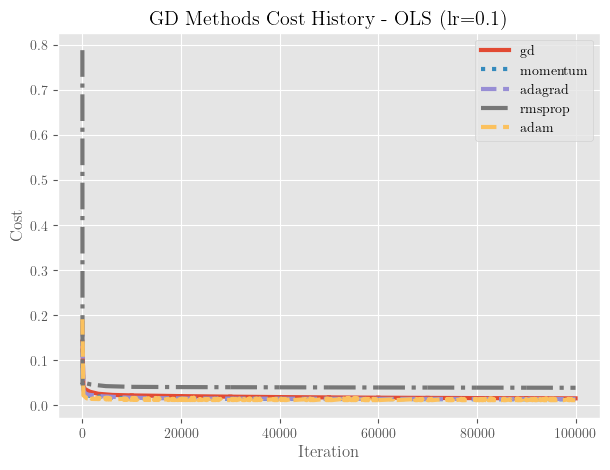

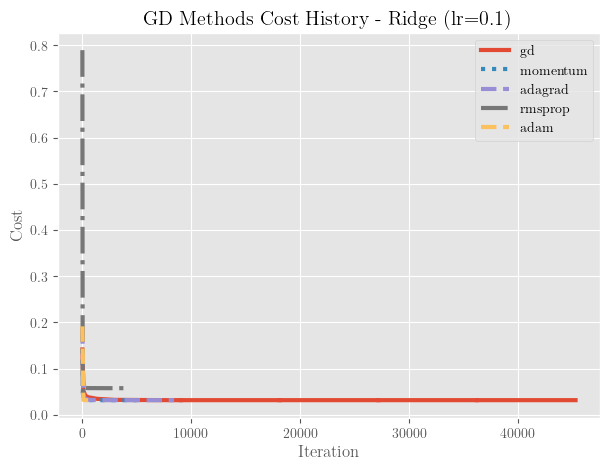

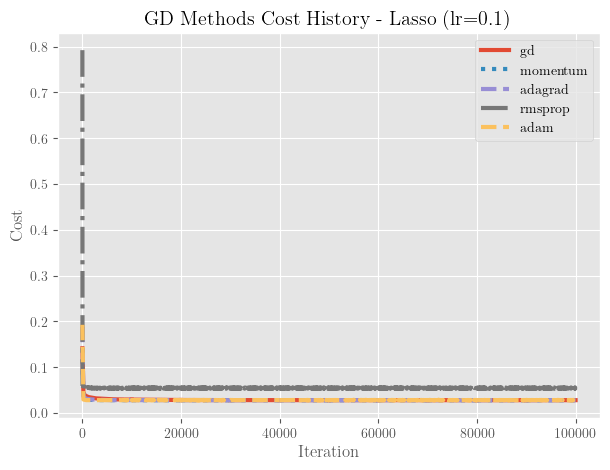

In [10]:
linestyle_cost_history = {'gd': '-', 'momentum': ':', 'adagrad': '--', 'rmsprop': '-.', 'adam': '--'}
# Plot cost history for all methods
plt.figure(figsize=(7, 5))
for method in methods:
    plt.plot(results[method]['cost_history_OLS'], label=method, linewidth=3, linestyle=linestyle_cost_history[method], alpha=1)
plt.title("GD Methods Cost History - OLS (lr=0.1)")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.legend()
if save_fig_or_not == True:
    plt.savefig(out_dir / f"C_cost_OLS.pdf", dpi=200, bbox_inches="tight")
plt.show()
plt.figure(figsize=(7, 5))
for method in methods:
    plt.plot(results[method]['cost_history_Ridge'], label=method, linewidth=3, linestyle=linestyle_cost_history[method], alpha=1)
plt.title("GD Methods Cost History - Ridge (lr=0.1)")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.legend()
if save_fig_or_not == True:
    plt.savefig(out_dir / f"C_cost_Ridge.pdf", dpi=200, bbox_inches="tight")
plt.show()
plt.figure(figsize=(7, 5))
for method in methods:
    plt.plot(results[method]['cost_history_Lasso'], label=method, linewidth=3, linestyle=linestyle_cost_history[method], alpha=1)
plt.title("GD Methods Cost History - Lasso (lr=0.1)")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.legend()
if save_fig_or_not == True:
    plt.savefig(out_dir / f"C_cost_Lasso.pdf", dpi=200, bbox_inches="tight")
plt.show()

In [11]:
# # Plot the results from OLS and Ridge on the test data
# plt.figure(figsize=(12, 8))
# # Plot the true function, however we need to sort x for this
# sort_indices_full = np.argsort(x.flatten())
# plt.plot(x[sort_indices_full], y[sort_indices_full], color='gray', linestyle=':', label='Runge Function', linewidth=2.5, alpha=0.5)
# # Sort x_test and corresponding predictions for better plotting
# sort_indices = np.argsort(x_test.flatten())
# for method in methods:
#     plt.plot(x_test[sort_indices], X_test[sort_indices] @ results[method]['theta_OLS'],   label=f'GD ({method})',   linewidth=3, linestyle='--')
#     #plt.plot(x_test[sort_indices], X_test[sort_indices] @ results[method]['theta_Ridge'], label=f'GD Ridge ({method})', linewidth=2.5, linestyle='-.')
#     #plt.plot(x_test[sort_indices], X_test[sort_indices] @ results[method]['theta_Lasso'], label=f'GD Lasso ({method})', linewidth=2, linestyle=':')
# plt.xlabel("x")
# plt.ylabel("y")
# plt.title("Model Predictions vs Runge Function - OLS")
# # Making the legend outside the plot
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
# plt.show()

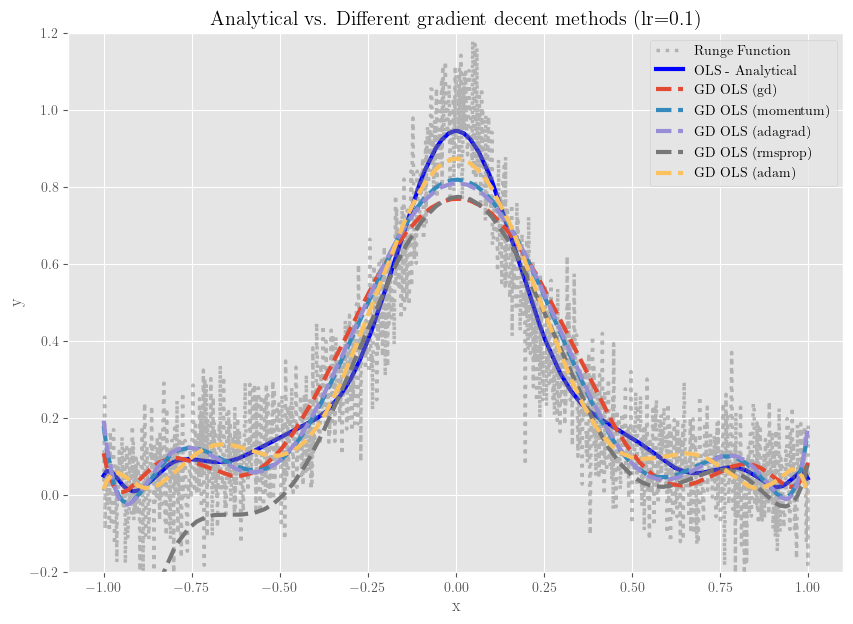

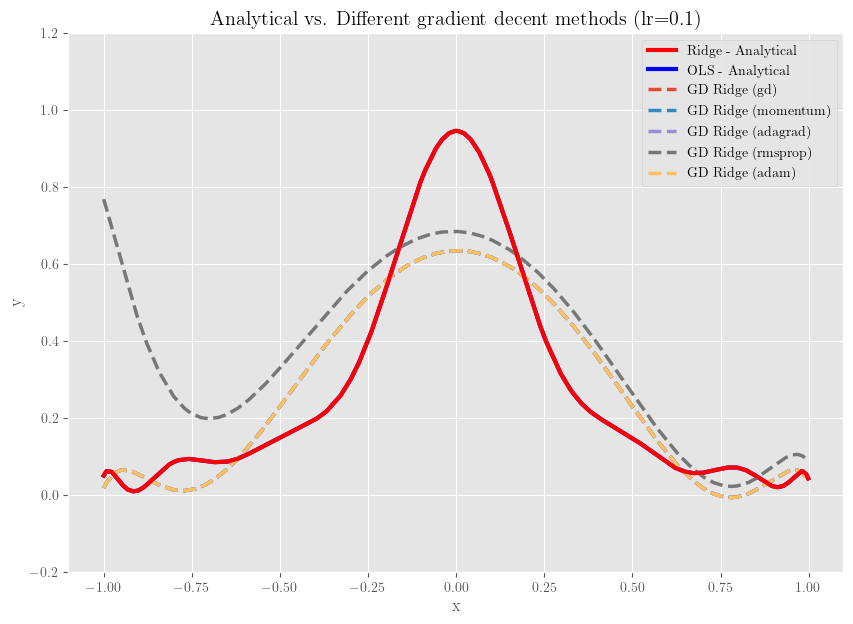

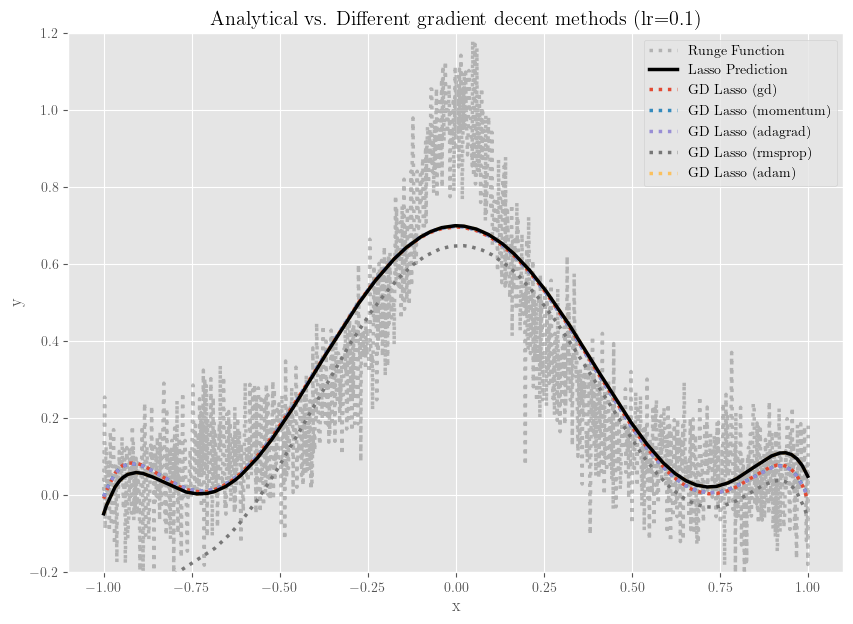

In [12]:
# Plot the results from OLS and Ridge on the test data
plt.figure(figsize=(10,7))
# Plot the true function, however we need to sort x for this
sort_indices_full = np.argsort(x.flatten())
plt.plot(x[sort_indices_full], y[sort_indices_full], color='gray', linestyle=':', label='Runge Function', linewidth=2.5, alpha=0.5)
# Sort x_test and corresponding predictions for better plotting
sort_indices = np.argsort(x_test.flatten())
plt.plot(x_test[sort_indices], y_pred_ols[sort_indices],   color='blue', label='OLS - Analytical',   zorder=1, linewidth=3, linestyle='-')
for method in methods:
    plt.plot(x_test[sort_indices], X_test[sort_indices] @ results[method]['theta_OLS'],   label=f'GD OLS ({method})',   linewidth=3, linestyle='--')
plt.xlabel("x")
plt.ylabel("y")
plt.ylim(-0.2,1.2)
plt.title("Analytical vs. Different gradient decent methods (lr={})".format(learning_rate))
plt.legend()
if save_fig_or_not == True:
    plt.savefig(out_dir / f"C_analytical_ols_comparison_gd_methods.pdf", dpi=200, bbox_inches="tight")
plt.show()

# Plot the results from OLS and Ridge on the test data
plt.figure(figsize=(10,7))
# Plot the true function, however we need to sort x for this
sort_indices_full = np.argsort(x.flatten())
plt.plot(x_test[sort_indices], y_pred_ridge[sort_indices], color='red',  label='Ridge - Analytical', zorder=8, linewidth=3, linestyle='-')
# Sort x_test and corresponding predictions for better plotting
sort_indices = np.argsort(x_test.flatten())
plt.plot(x_test[sort_indices], y_pred_ols[sort_indices],   color='blue', label='OLS - Analytical',   zorder=1, linewidth=3, linestyle='-')
for method in methods:
    plt.plot(x_test[sort_indices], X_test[sort_indices] @ results[method]['theta_Ridge'], label=f'GD Ridge ({method})', linewidth=2.5, linestyle='--')
plt.xlabel("x")
plt.ylabel("y")
plt.ylim(-0.2,1.2)
plt.title("Analytical vs. Different gradient decent methods (lr={})".format(learning_rate))
plt.legend()
if save_fig_or_not == True:
    plt.savefig(out_dir / f"C_analytical_ridge_comparison_gd_methods.pdf", dpi=200, bbox_inches="tight")
plt.show()

# Plot the results from OLS and Ridge on the test data
plt.figure(figsize=(10,7))
# Plot the true function, however we need to sort x for this
sort_indices_full = np.argsort(x.flatten())
plt.plot(x[sort_indices_full], y[sort_indices_full], color='gray', linestyle=':', label='Runge Function', linewidth=2.5, alpha=0.5)
# Sort x_test and corresponding predictions for better plotting
sort_indices = np.argsort(x_test.flatten())
plt.plot(x_test[sort_indices], y_pred_Lasso[sort_indices], color='Black',  label='Lasso Prediction', zorder=8, linewidth=2.5, linestyle='-')
for method in methods:
    plt.plot(x_test[sort_indices], X_test[sort_indices] @ results[method]['theta_Lasso'], label=f'GD Lasso ({method})', linewidth=2.5, linestyle=':')
plt.xlabel("x")
plt.ylabel("y")
plt.ylim(-0.2,1.2)
plt.title("Analytical vs. Different gradient decent methods (lr={})".format(learning_rate))
# Making the legend outside the plot
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.legend()
if save_fig_or_not == True:
    plt.savefig(out_dir / f"C_analytical_lasso_comparison_gd_methods.pdf", dpi=200, bbox_inches="tight")
plt.show()

ridge: rmsprop converged after 27782 iterations.
ridge: rmsprop converged after 27850 iterations.
ridge: rmsprop converged after 27849 iterations.
ridge: rmsprop converged after 27834 iterations.
ridge: rmsprop converged after 28016 iterations.
ridge: adam converged after 28730 iterations.
ridge: adam converged after 28730 iterations.
ridge: adam converged after 28730 iterations.
ridge: adam converged after 28730 iterations.
ridge: adam converged after 28730 iterations.


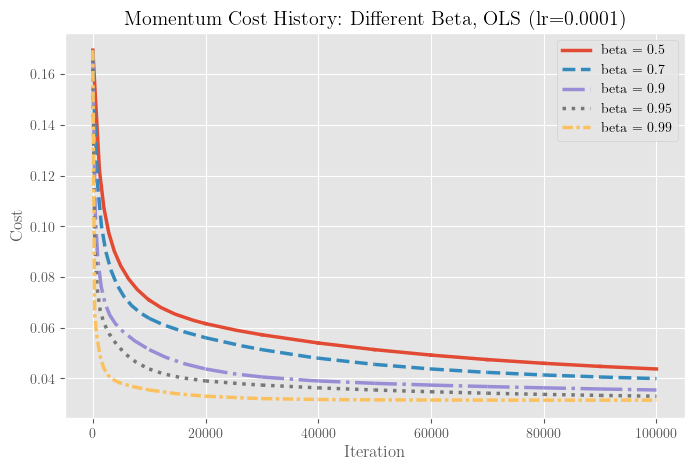

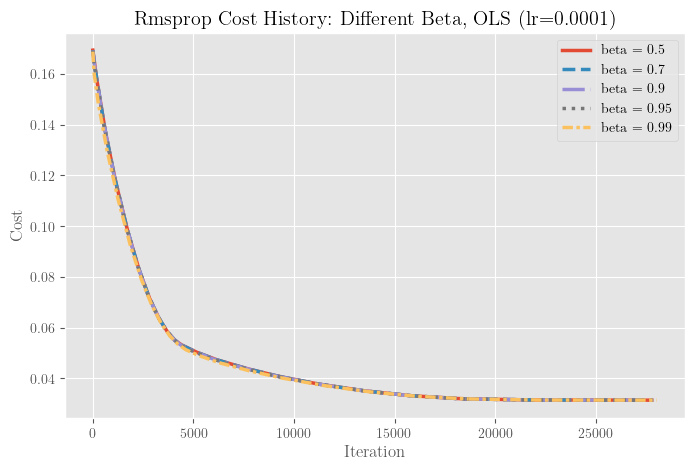

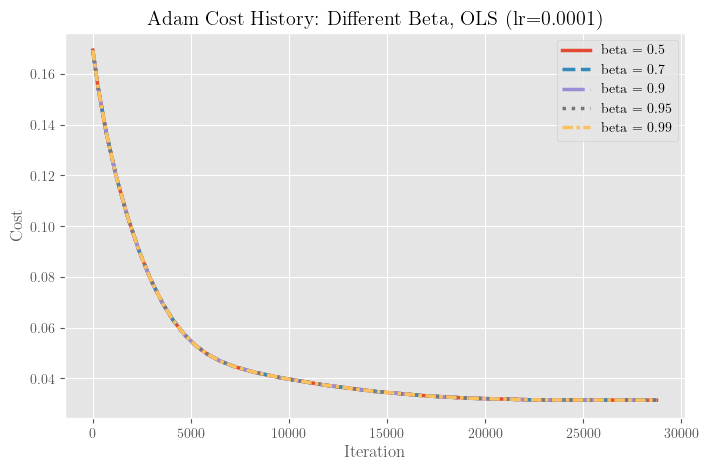

In [13]:
# Define beta values to test
beta_values = [0.5, 0.7, 0.9, 0.95, 0.99]
methods_with_beta = ['momentum', 'rmsprop', 'adam']

# Initialize an empty dictionary to store results for each beta value per method
results_by_beta = {method: {} for method in methods_with_beta}

for method in methods_with_beta:
    for beta in beta_values:
        theta, cost_history = gradient_descent_advanced(
            X_train, 
            y_train, 
            method=method, 
            lr_method='ridge', 
            learning_rate=0.0001, 
            n_iterations=n_iterations, 
            tol=tolerance, 
            use_tol=1e-10, 
            beta=beta, 
            beta1=beta1, 
            beta2=beta2, 
            epsilon=epsilon, 
            lambda_=lambda_
        )
        results_by_beta[method][beta] = cost_history

# Plot cost history for each method separately
beta_linestyles = {0.5: '-', 0.7: '--', 0.9: '-.', 0.95: ':', 0.99: (0, (3, 1, 1, 1))}  # Custom linestyle for each beta
for method in methods_with_beta:
    plt.figure(figsize=(8, 5))
    for beta in beta_values:
        plt.plot(results_by_beta[method][beta], label=f'beta = {beta}', linewidth=2.5, linestyle=beta_linestyles[beta])

    plt.title(f"{method.capitalize()} Cost History: Different Beta, OLS (lr=0.0001)")
    plt.xlabel("Iteration")
    plt.ylabel("Cost")
    plt.legend()
    if save_fig_or_not == True:
        plt.savefig(out_dir / f"C_cost_for_different_gd_methods_{method}.pdf", dpi=200, bbox_inches="tight")
    plt.show()